# Imports

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

%matplotlib inline

# Constants

In [2]:
CROPPED_CONTOURS_FOLDER = 'Cropped_Contours/'
SAMPLE_IMAGE = 'Image_Samples/Sample2.jpeg'

ARR_RIGHT_SECTION_ROWS_CONTOURS = []
ARR_RIGHT_SECTION_COL_CONTOURS = []

# Helper Functions

In [3]:
def find_contour_with_least_area(contours):
    '''
    This function will calculate contours area and return the least one
    Parameters:
    contours: All contours hierarchy array
    '''
    
    # Step1: Find areas of every contour
    areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        # All areas appended in sequence
        areas.append(int(area))
        
    # Step2: Find the contour index with the least area
    least_area = areas[0]
    index = 0
    
    for i in range(0, len(areas)):
        if areas[i] <= least_area:
            # Update least value
            least_area = areas[i]
            index = i
            
    # Step3: Return the least area contour index
    return index

def find_contour_with_greatest_area(contours):
    '''
    This function will calculate contours area and return the least one
    Parameters:
    contours: All contours hierarchy array
    '''
    
    # Step1: Find areas of every contour
    areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        # All areas appended in sequence
        areas.append(int(area))
        
    # Step2: Find the contour index with the least area
    greatest_area = areas[0]
    index = 0
    
    for i in range(0, len(areas)):
        if areas[i] >= greatest_area:
            # Update least value
            greatest_area = areas[i]
            index = i
            
    # Step3: Return the least area contour index
    return index, areas


def draw_rectangle_on_img_contours_and_save_them(contours, image, arr_contours):
    '''
    This function will draw rectangles on image
    Parameters:
    contours : array
    image: image
    arr_contours: array in which cropped contours to be saved
    '''
    total_contours = len(contours)
    rect_color = (255,0,0)
    rect_stroke_width = 2
    
    for i in range(total_contours):
        cnt = contours[i]
        x,y,w,h = cv2.boundingRect(cnt)
        image = cv2.rectangle(image, (x,y), (x+w,y+h), rect_color, rect_stroke_width)
        
        # Cropping individual contours and saving them as separate image
        cropping_rectangles_and_saving_them(x,y,x+w,y+h,image,i,arr_contours)
        
    # To visualize all contours on image
    plt.imshow(image)
    plt.show()
    
    
def cropping_rectangles_and_saving_them(left,upper,right,lower, image_name, cropped_image_name, arr_contours):
    '''
    This function will crop all the bounding rectangles from an image
    Parameters:
    left=x,upper=y,right=x+w,lower=y+h
    image_name: original image
    cropped_image_name: individual cropped images name
    '''
    # Opens image using PIL
    #im = Image.open(image_name)
    im = Image.fromarray(image_name, 'RGB')
    
    # Crop image from original image
    box = (left,upper,right,lower)
    cropped_image = im.crop(box)
    
    # Appending cropped contours
    arr_contours.append(cropped_image)
    
    # Saved cropped image
    #cropped_image.save(f'{CROPPED_CONTOURS_COL_FOLDER}{cropped_image_name}.png')

# Image Processing

## 1. Reading image & Splitting it by 30 and 70 ratio

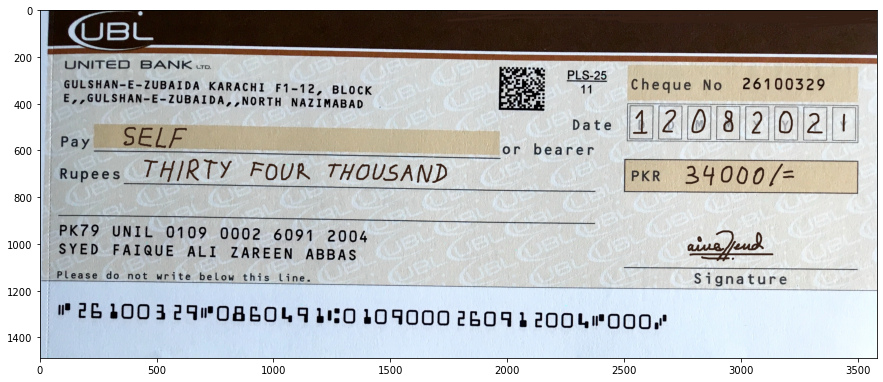

In [4]:
# Read image using opencv
img = cv2.imread(SAMPLE_IMAGE)

# Display image using matplotlib
plt.figure(figsize=(15,7))
plt.imshow(img)
plt.show()

In [5]:
y = img.shape[0] #Height
x = img.shape[1] #Width

### 1a. Left Section :70% of image

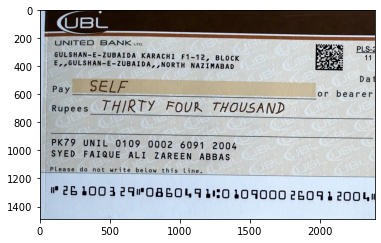

In [6]:
crop_ratio = int(x/3) # 100%-30% = 70%
left_crop_img = img[0:y, 0:x-crop_ratio] #[height, width]

plt.imshow(left_crop_img)
plt.show()

### 1b. Right Section :30% of image

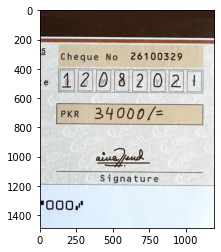

In [7]:
crop_ratio = int(x/3) # 100%-30% = 70%
right_crop_img = img[0:y, x-crop_ratio:x] #[height, width] 

plt.imshow(right_crop_img)
plt.show()

### 2. Extracting only desired section from Left Cropped Image(70%)

<p>Vertically 20-25% above and the below area is of our no use. Discard it.</p>

In [8]:
y = left_crop_img.shape[0] #Height
x = left_crop_img.shape[1] #Width

print(f'Width: {x} || Height: {y}')

Width: 2388 || Height: 1488


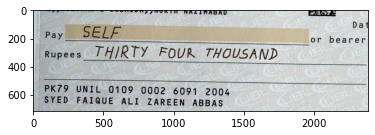

In [9]:
# Crop vertically(height)
crop_ratio = int(y/1.35) # 100%-13.5% = 86.5%
sub_left_crop_img = left_crop_img[y-crop_ratio:y-(y-crop_ratio), 0:x] #[height, width] => [362,]

plt.imshow(sub_left_crop_img)
plt.show()

### 3. Extracting only desired section from Right Cropped Image(30%)

<p>Vertically 10-15% above and 30-45% below area is of our no use. Discard it.</p>

In [10]:
y = right_crop_img.shape[0] #Height
x = right_crop_img.shape[1] #Width

print(f'Width: {x} || Height: {y}')

Width: 1194 || Height: 1488


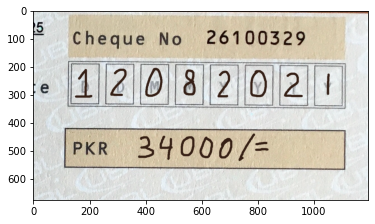

In [11]:
# Crop vertically(height)
bottom_crop_ratio = int(y/2.5) # 100%-25% = 75%
top_crop_ratio = int(y/6.8) # 100%-68% = 30%

sub_right_crop_img = right_crop_img[top_crop_ratio:y-bottom_crop_ratio, 0:x] #[height, width] => [362,]

plt.imshow(sub_right_crop_img)
plt.show()

## 2. Extracting handwritten details from right image

### 2.1 Finding no of rows & meshing them together to extract rows

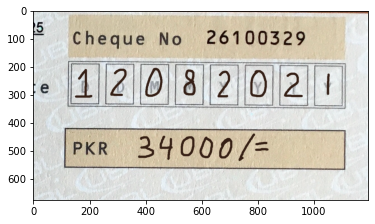

In [12]:
# Display image using matplotlib
plt.imshow(sub_right_crop_img)
plt.show()

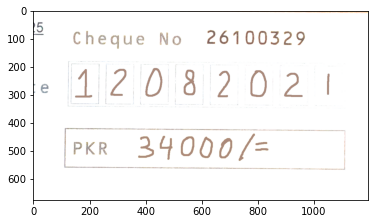

In [13]:
alpha = 1.5 # Contrast control (1.0-3.0)
beta = 90 # Brightness control (0-100)

adjusted = cv2.convertScaleAbs(sub_right_crop_img, alpha=alpha, beta=beta)

plt.imshow(adjusted)
plt.show()

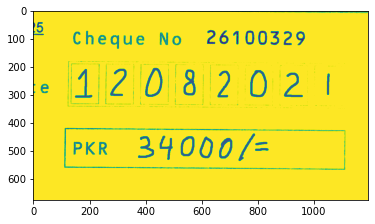

In [14]:
# convert the image to grayscale format
img_gray = cv2.cvtColor(adjusted, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray)
plt.show()

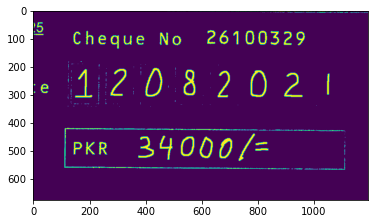

In [15]:
# apply thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)

plt.imshow(thresh)
plt.show()

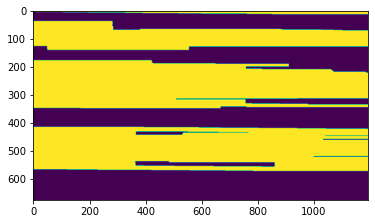

In [16]:
# Finding rows
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (500,10))
dilation = cv2.dilate(thresh, rect_kernel, iterations=1)

plt.imshow(dilation)
plt.show()

### 2.2. Find rows contours of the image

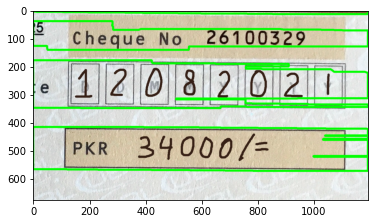

In [17]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=dilation, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = sub_right_crop_img.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=5, lineType=cv2.LINE_AA)
               
plt.imshow(image_copy)
plt.show()

In [18]:
len(contours)

4

<p>
    As we are only expecting 2 rows in this part, but if we got more than 2, so we have to find the extraneous contour and eliminate it.
</p>

In [19]:
if len(contours) > 2:
    index = find_contour_with_least_area(contours)
    del contours[index]

In [20]:
len(contours)

3

In [21]:
if len(contours) > 2:
    index = find_contour_with_least_area(contours)
    del contours[index]

In [22]:
len(contours)

2

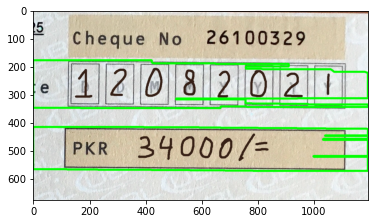

In [23]:
# draw contours on the original image
image_copy = sub_right_crop_img.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=5, lineType=cv2.LINE_AA)
               
plt.imshow(image_copy)
plt.show()

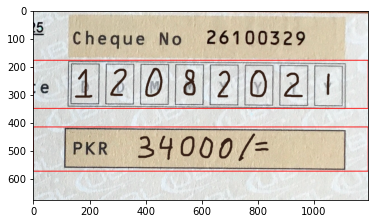

In [24]:
ARR_RIGHT_SECTION_ROWS_CONTOURS.clear()
draw_rectangle_on_img_contours_and_save_them(contours, sub_right_crop_img, ARR_RIGHT_SECTION_ROWS_CONTOURS)

In [25]:
len(ARR_RIGHT_SECTION_ROWS_CONTOURS)

2

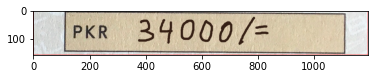

In [26]:
# Show cropped images
plt.imshow(ARR_RIGHT_SECTION_ROWS_CONTOURS[0])
plt.show()

In [27]:
type(ARR_RIGHT_SECTION_ROWS_CONTOURS[0])

PIL.Image.Image

### 2.3. Find col contours of the image

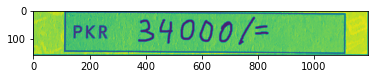

In [28]:
img = np.array(ARR_RIGHT_SECTION_ROWS_CONTOURS[0])

# convert the image to grayscale format
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray)
plt.show()

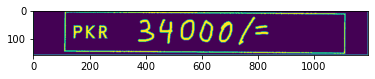

In [29]:
# apply thresholding
ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_OTSU|cv2.THRESH_BINARY_INV)

plt.imshow(thresh)
plt.show()

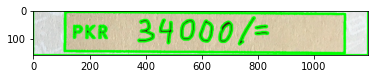

In [30]:
# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
                                     
# draw contours on the original image
image_copy = img.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=4, lineType=cv2.LINE_AA)
               
plt.imshow(image_copy)
plt.show()

In [31]:
len(contours)

21

In [32]:
index, areas = find_contour_with_greatest_area(contours)
areas

[186108,
 184758,
 140144,
 132871,
 354,
 306,
 896,
 158,
 653,
 812,
 208,
 0,
 2499,
 1062,
 2604,
 1289,
 2858,
 1491,
 1365,
 1210,
 862]

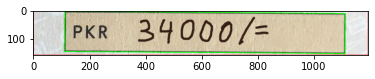

In [33]:
# draw contours on the original image
image_copy = img.copy()
cv2.drawContours(image=image_copy, contours=contours[2], contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
               
plt.imshow(image_copy)
plt.show()